In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def criar_dados_teste_np2():
    data = {
        'idade': [25, 45, 35, 50, 23],
        'salario': [2500, 8000, 5000, 10000, 1800],
        'horas_trabalhadas': [40, 50, 45, 60, 35],
        'genero': ['F', 'M', 'F', 'M', 'F'],
        'educacao': ['Médio', 'Superior', 'Médio', 'Pós', 'Fundamental'],
        'data_contratacao': pd.to_datetime(['2021-05-10', '2019-03-15', '2020-08-01', '2018-11-23', '2022-01-05'])
    }
    return pd.DataFrame(data)


In [3]:
df_teste = criar_dados_teste_np2()
print(df_teste)


   idade  salario  horas_trabalhadas genero     educacao data_contratacao
0     25     2500                 40      F        Médio       2021-05-10
1     45     8000                 50      M     Superior       2019-03-15
2     35     5000                 45      F        Médio       2020-08-01
3     50    10000                 60      M          Pós       2018-11-23
4     23     1800                 35      F  Fundamental       2022-01-05


In [4]:
#Normalização(escala de 0 a 1)
def normalizar_dados(df, colunas):
    scaler = MinMaxScaler()
    df[colunas] = scaler.fit_transform(df[colunas])
    return df


In [5]:
#Padronização(escala c/ média 0 e desvio padrão 1)
def padronizar_dados(df, colunas):
    scaler = StandardScaler()
    df[colunas] = scaler.fit_transform(df[colunas])
    return df


In [6]:
#One-Hot Enconding
def one_hot_encode(df, colunas):
    return pd.get_dummies(df, columns=colunas)


In [7]:
#Label Enconding
def label_encode(df, colunas):
    le = LabelEncoder()
    for col in colunas:
        df[col] = le.fit_transform(df[col])
    return df


In [8]:
#Caracteristicas de Interação
def criar_caracteristica_interacao(df, col1, col2, nome_nova_coluna):
    df[nome_nova_coluna] = df[col1] * df[col2]
    return df


In [9]:
#Extração de Caracteristicas de Data
def extrair_caracteristica_data(df, coluna_data):
    df['data_ano'] = df[coluna_data].dt.year
    df['data_mes'] = df[coluna_data].dt.month
    df['data_dia'] = df[coluna_data].dt.day
    return df


In [10]:
#PCA
def aplicar_pca(df, n_componentes=2):
    pca = PCA(n_components=n_componentes)
    componentes = pca.fit_transform(df)
    df_pca = pd.DataFrame(componentes, columns=[f'PC{i+1}' for i in range(n_componentes)])
    return df_pca


In [11]:
#Histograma
def plotar_histogramas(df, colunas):
    for col in colunas:
        df[col].plot(kind='hist', bins=10, title=f'Histograma de {col}')
        plt.xlabel(col)
        plt.show()


In [12]:
#Boxplots
def plotar_boxplots(df, colunas):
    for col in colunas:
        df.boxplot(column=col)
        plt.title(f'Boxplot de {col}')
        plt.show()


In [14]:
#Mapa de Calor
def plotar_mapa_calor_correlacao(df):
    correlacao = df.corr()
    sns.heatmap(correlacao, annot=True, cmap='coolwarm')
    plt.title("Mapa de Calor da Correlação")
    plt.show()


In [16]:
#teste1 - Normalização
def plotar_mapa_calor_correlacao(df):
    correlacao = df.corr()
    sns.heatmap(correlacao, annot=True, cmap='coolwarm')
    plt.title("Mapa de Calor da Correlação")
    plt.show()


In [15]:
#teste2 - Padronização
print("2. Padronização:")
df_pad = padronizar_dados(df_teste.copy(), ['horas_trabalhadas'])
print(df_pad[['horas_trabalhadas']])


2. Padronização:
   horas_trabalhadas
0          -0.697486
1           0.464991
2          -0.116248
3           1.627467
4          -1.278724


In [17]:
#teste3 - One Hot Enconding
print("3. One-Hot Encoding:")
df_ohe = one_hot_encode(df_teste.copy(), ['genero'])
print(df_ohe)


3. One-Hot Encoding:
   idade  salario  horas_trabalhadas     educacao data_contratacao  genero_F  \
0     25     2500                 40        Médio       2021-05-10      True   
1     45     8000                 50     Superior       2019-03-15     False   
2     35     5000                 45        Médio       2020-08-01      True   
3     50    10000                 60          Pós       2018-11-23     False   
4     23     1800                 35  Fundamental       2022-01-05      True   

   genero_M  
0     False  
1      True  
2     False  
3      True  
4     False  


In [18]:
#teste4 - Label Encoding
print("4. Label Encoding:")
df_le = label_encode(df_teste.copy(), ['educacao'])
print(df_le)


4. Label Encoding:
   idade  salario  horas_trabalhadas genero  educacao data_contratacao
0     25     2500                 40      F         1       2021-05-10
1     45     8000                 50      M         3       2019-03-15
2     35     5000                 45      F         1       2020-08-01
3     50    10000                 60      M         2       2018-11-23
4     23     1800                 35      F         0       2022-01-05


In [25]:
#teste5 - Interação
print("5. Interação:")
df_inter = criar_caracteristica_interacao(df_teste.copy(), 'idade', 'horas_trabalhadas', 'idade_x_horas')
print(df_inter[['idade', 'horas_trabalhadas', 'idade_x_horas']])



5. Interação:
   idade  horas_trabalhadas  idade_x_horas
0     25                 40           1000
1     45                 50           2250
2     35                 45           1575
3     50                 60           3000
4     23                 35            805


In [20]:
#teste6 - Data
print("6. Características de Data:")
df_data = extrair_caracteristica_data(df_teste.copy(), 'data_contratacao')
print(df_data[['data_contratacao', 'data_ano', 'data_mes', 'data_dia']])


6. Características de Data:
  data_contratacao  data_ano  data_mes  data_dia
0       2021-05-10      2021         5        10
1       2019-03-15      2019         3        15
2       2020-08-01      2020         8         1
3       2018-11-23      2018        11        23
4       2022-01-05      2022         1         5


In [21]:
#teste7 - PCA
print("7. PCA:")
df_pca = aplicar_pca(df_teste[['idade', 'salario', 'horas_trabalhadas']].dropna(), 2)
print(df_pca)


7. PCA:
           PC1       PC2
0 -2960.024380  2.007549
1  2540.018876 -2.909810
2  -460.000431 -0.063682
3  4540.043945  2.053572
4 -3660.038010 -1.087630


8. Histogramas:


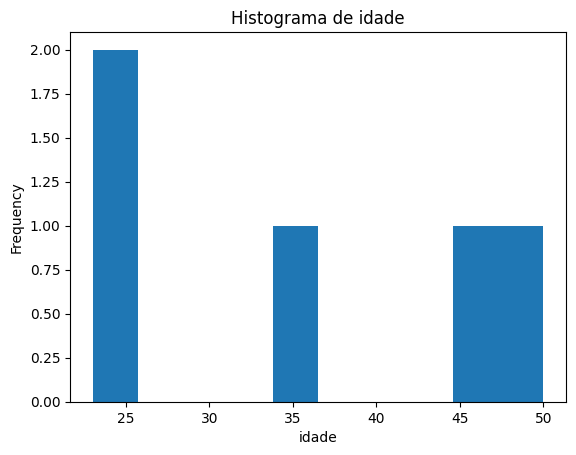

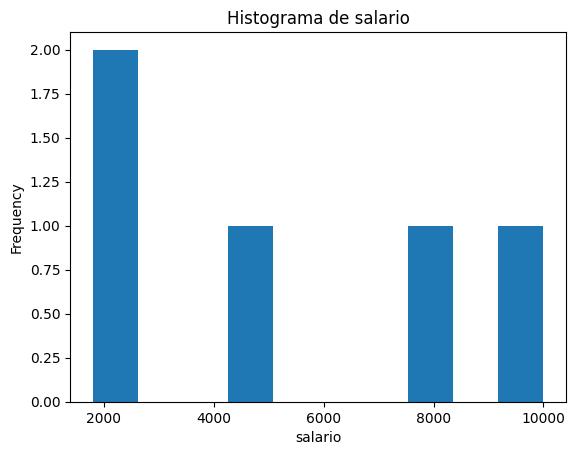

In [22]:
#teste8 - Histograma
print("8. Histogramas:")
plotar_histogramas(df_teste.copy(), ['idade', 'salario'])


9. Boxplots:


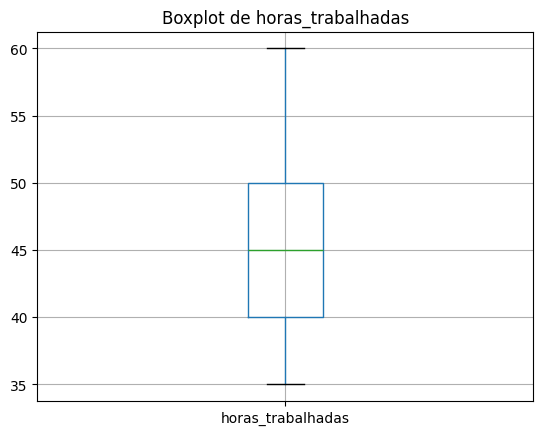

In [23]:
#teste9 - Boxplots
print("9. Boxplots:")
plotar_boxplots(df_teste.copy(), ['horas_trabalhadas'])


10. Mapa de Calor:


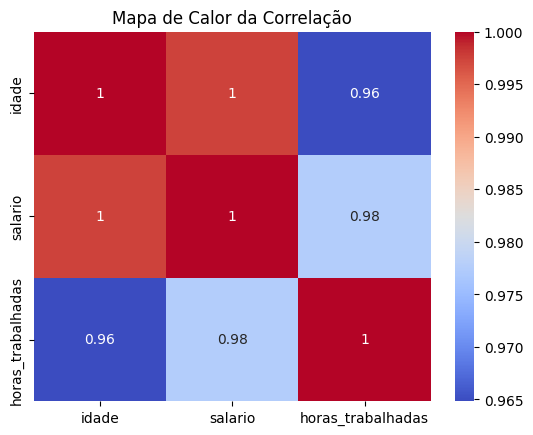

In [24]:
#teste10 - Mapa de calor
print("10. Mapa de Calor:")
plotar_mapa_calor_correlacao(df_teste[['idade', 'salario', 'horas_trabalhadas']])
